<div align='center'>
  Pontifícia Universidade Católica de Minas Gerais</br>
  Programa de Pós-Graduação em Ciência de Dados e Big Data</br>
  Machine Learning
</div>
</br>

<div align='center'>
  <h1><b>Trabalho Prático - Spaceship Titanic</b></h1>
</div>
</br>

<div align='right'>
  Aluno: Marco Túlio Barbosa Andrade</br>
  Professor: Cristiano Rodrigues de Carvalho
</div>
</br>

<div align='center'>
  Belo Horizonte</br>
  2022
</div>

# Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from math import floor

from sklearn.feature_extraction import DictVectorizer   # Binarização dos atributos
from sklearn.preprocessing import LabelEncoder          # Codificação dos rótulos

from sklearn.model_selection import train_test_split    # Divisão da base em treinamento e validação
from sklearn.model_selection import RandomizedSearchCV  # Busca de hiperparâmetros

from sklearn.tree import DecisionTreeClassifier         # Árvore de decisão
from sklearn.ensemble import RandomForestClassifier     # Floresta aleatória
from sklearn.linear_model import LogisticRegression     # Regressão logística
from sklearn.ensemble import ExtraTreesClassifier     # Árvores extras
from sklearn.ensemble import VotingClassifier           # Ensemble - Votação
from sklearn.ensemble import AdaBoostClassifier         # Ensemble - AdaBoost

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # Métricas de avaliação

# Importação dos dados

In [ ]:
df_train = pd.read_csv('train.csv', index_col=None, header=0)
df_test = pd.read_csv('test.csv', index_col=None, header=0)

# Análise inicial

In [ ]:
# Cabeçalho
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Rodapé
df_train.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
# Número de linhas e colunas
df_train.shape

(8693, 14)

In [ ]:
# Informações
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# Dados faltantes
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Estatística descritiva

In [ ]:
# Campos numéricos
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# Campos não-numérico
df_train.select_dtypes(include='object').describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# Tratamento dos dados

## Dados faltantes em geral

- Criação de nova coluna:
 - NullColumns - contém o número de campos nulos por passageiro
- Remoção de registros com mais de 1 (um) campo null

In [ ]:
# Cópia do dataframe
df_train_clean = df_train.copy()

In [ ]:
# Criação de coluna com o número de campos nulos
df_train_clean['NullColumns'] = df_train_clean.isnull().sum(axis=1)

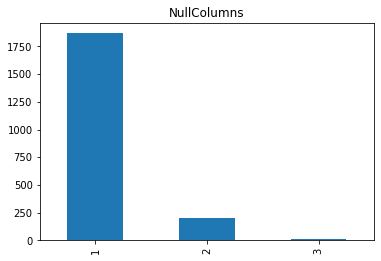

In [ ]:
# Visualização das linhas com pelo menos um campo nulo
df_train_clean[df_train_clean['NullColumns']>0]['NullColumns'].value_counts().plot.bar(title='NullColumns')

In [ ]:
# Verificação das linhas com mais de um campo nulo
df_train_clean[df_train_clean['NullColumns']>1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NullColumns
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,2
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True,2
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True,2
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,2
251,0278_01,Earth,False,NaN,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,888.0,NaN,Judya Beachez,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,2
8623,9197_04,Europa,False,C/308/P,55 Cancri e,30.0,False,1569.0,NaN,0.0,NaN,2252.0,Phecca Platch,False,2
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,2
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,2


In [ ]:
# Remoção das linhas com mais de um campo nulo
df_train_clean.drop(df_train_clean.loc[df_train_clean['NullColumns']>1].index, inplace=True)

In [ ]:
# Verificação da base após limpeza
print('Número de linhas antes da limpeza: ', df_train.shape[0])
print('Número de linhas após a limpeza: ', df_train_clean.shape[0])
print('Número de linhas removidas: ', df_train.shape[0] - df_train_clean.shape[0])
print(f'Porcentagem de linhas removidas: {(((df_train.shape[0] - df_train_clean.shape[0]) / df_train.shape[0])*100):.2f}%')

Número de linhas antes da limpeza:  8693
Número de linhas após a limpeza:  8473
Número de linhas removidas:  220
Porcentagem de linhas removidas: 2.53%


## Campo PassengerID

- Sem dados nulos
- Criação de novas colunas:
 - PassengerGroup - contém o grupo do passageiro
 - PassengerGroupNumber - contém o número do passageiro dentro de seu grupo
 - Group - indica se o passageiro viajou em grupo com mais alguém

In [ ]:
# Verificação dos dados
df_train_clean['PassengerId'].unique()

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

In [ ]:
# Criação das colunas PassengerGroup e PassengerGroupNumber
df_train_clean['PassengerGroup'], df_train_clean['PassengerGroupNumber'] = df_train_clean['PassengerId'].str.split('_').str
df_train_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NullColumns,PassengerGroup,PassengerGroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,9280,01


In [ ]:
# Verificação dos dados
df_train_clean['PassengerGroup'].unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [ ]:
# Verificação dos dados
df_train_clean['PassengerGroupNumber'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [ ]:
# Contagem de passageiros por grupo
passenger_group = df_train_clean.groupby(['PassengerGroup']).size()
passenger_group

PassengerGroup
0001    1
0002    1
0003    2
0004    1
0005    1
       ..
9275    3
9276    1
9278    1
9279    1
9280    2
Length: 6102, dtype: int64

In [ ]:
# Criação da coluna Group
df_train_clean['Group'] = (passenger_group.loc[df_train_clean['PassengerGroup']] > 1).tolist()
df_train_clean

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NullColumns,PassengerGroup,PassengerGroupNumber,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0001,01,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0002,01,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0003,01,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0003,02,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0004,01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,9276,01,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,9278,01,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,9279,01,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,9280,01,True


In [ ]:
# Verificação dos dados
df_train_clean['Group'].unique()

array([False,  True])

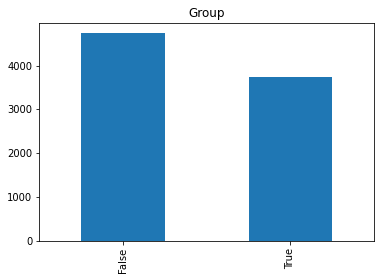

In [ ]:
# Visualização dos dados
df_train_clean['Group'].value_counts().plot.bar(title='Group')

## Campo HomePlanet

- Com dados nulos
- Criação de novas colunas:
 - HomePlanetMode - contém a moda de HomePlanet por grupo de passageiros
 - HomePlanet2 - contém os dados de HomePlanet após tratamento
- Imputação de dados por:
 1. Moda do grupo de passageiros
 2. Moda geral

In [ ]:
# Verificação dos dados
df_train_clean['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NullColumns,PassengerGroup,PassengerGroupNumber,Group
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False,1,0119,01,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,1,0242,01,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True,1,0251,01,False
274,0303_01,NaN,True,G/41/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Oraryn Kirklander,True,1,0303,01,False
286,0315_01,NaN,True,G/42/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Adriet Valezaley,True,1,0315,01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,9043_01,NaN,True,F/1848/P,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,Cobix Erle,True,1,9043,01,False
8489,9072_01,NaN,True,F/1758/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Gork Creke,True,1,9072,01,True
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,1,9084,01,False
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,1,9257,01,False


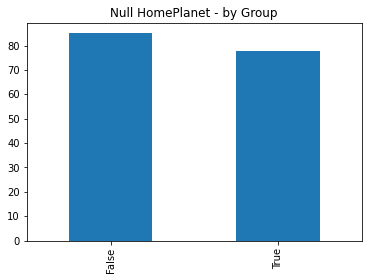

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['HomePlanet'].isnull()]['Group'].value_counts().plot.bar(title='Null HomePlanet - by Group')

In [ ]:
# Imputação de dados
df_train_clean['HomePlanet'].fillna('Lost', inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', 'Lost'], dtype=object)

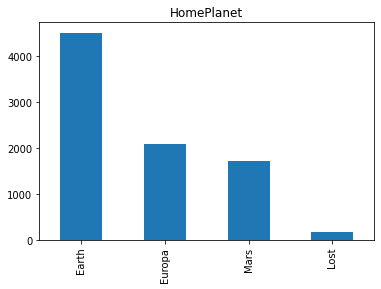

In [ ]:
# Visualização dos dados
df_train_clean['HomePlanet'].value_counts().plot.bar(title='HomePlanet')

In [ ]:
# Moda de HomePlanet por grupo
passenger_group = df_train_clean.groupby(['PassengerGroup'])['HomePlanet'].agg(lambda x: pd.Series.mode(x)[0])
passenger_group

PassengerGroup
0001    Europa
0002     Earth
0003    Europa
0004     Earth
0005     Earth
         ...  
9275    Europa
9276    Europa
9278     Earth
9279     Earth
9280    Europa
Name: HomePlanet, Length: 6102, dtype: object

In [ ]:
# Criação da coluna HomePlanetMode
df_train_clean['HomePlanetMode'] = passenger_group.loc[df_train_clean['PassengerGroup']].tolist()
df_train_clean['HomePlanetMode'].unique()

array(['Europa', 'Earth', 'Mars', 'Lost'], dtype=object)

In [ ]:
# Criação da coluna HomePlanet2
df_train_clean['HomePlanet2'] = np.where(df_train_clean['HomePlanet'] == 'Lost', df_train_clean['HomePlanetMode'], df_train_clean['HomePlanet'])
df_train_clean['HomePlanet2'].unique()

array(['Europa', 'Earth', 'Mars', 'Lost'], dtype=object)

In [ ]:
# Ajuste da coluna HomePlanet2 com imputação da moda geral
homeplanet_mode = df_train_clean['HomePlanet2'].mode()
df_train_clean['HomePlanet2'] = np.where(df_train_clean['HomePlanet2'] == 'Lost', homeplanet_mode, df_train_clean['HomePlanet2'])
df_train_clean['HomePlanet2'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

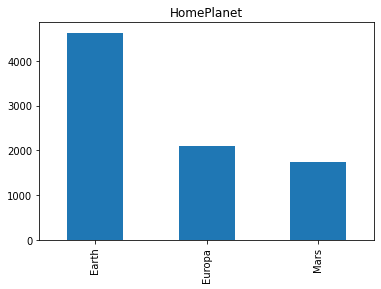

In [ ]:
# Visualização dos dados
df_train_clean['HomePlanet2'].value_counts().plot.bar(title='HomePlanet')

## Campo CryoSleep

- Com dados nulos
- Criação de novas colunas:
 - CryoSleepMode - contém a moda de CryoSleep por grupo de passageiros
 - CryoSleep2 - contém os dados de CryoSleep após tratamento
- Imputação de dados por:
 1. Moda do grupo de passageiros
 2. Moda geral

In [ ]:
# Verificação dos dados
df_train_clean['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['CryoSleep'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NullColumns,PassengerGroup,PassengerGroupNumber,Group,HomePlanetMode,HomePlanet2
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,1,0099,02,True,Earth,Earth
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False,1,0105,01,False,Earth,Earth
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,1,0110,02,True,Europa,Europa
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True,1,0173,01,False,Earth,Earth
175,0198_01,Earth,NaN,G/30/P,PSO J318.5-22,52.0,False,0.0,0.0,0.0,0.0,0.0,Jeroy Cookson,True,1,0198,01,False,Earth,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,9170_01,Earth,NaN,E/587/P,TRAPPIST-1e,33.0,False,1060.0,403.0,1.0,0.0,145.0,Jeandy Ewins,False,1,9170,01,False,Earth,Earth
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence,False,1,9193,01,False,Earth,Earth
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True,1,9197,01,True,Europa,Europa
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False,1,9227,05,True,Earth,Earth


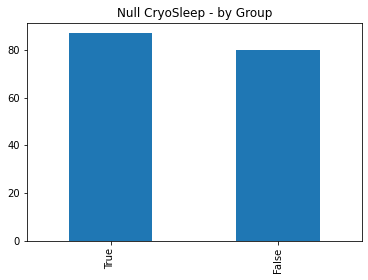

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['CryoSleep'].isnull()]['Group'].value_counts().plot.bar(title='Null CryoSleep - by Group')

In [ ]:
# Imputação de dados
df_train_clean['CryoSleep'].fillna('Lost', inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['CryoSleep'].unique()

array([False, True, 'Lost'], dtype=object)

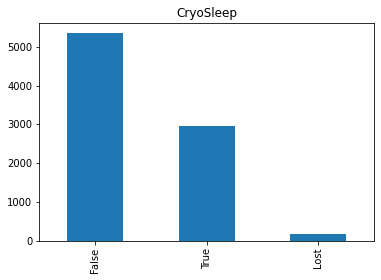

In [ ]:
# Visualização dos dados
df_train_clean['CryoSleep'].value_counts().plot.bar(title='CryoSleep')

In [ ]:
# Moda de CryoSleep por grupo
passenger_group = df_train_clean.groupby(['PassengerGroup'])['CryoSleep'].agg(lambda x: pd.Series.mode(x)[0])
passenger_group

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'bool'
  warn(f"Unable to sort modes: {err}")
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'bool' and 'str'
  warn(f"Unable to sort modes: {err}")


PassengerGroup
0001    False
0002    False
0003    False
0004    False
0005    False
        ...  
9275    False
9276    False
9278     True
9279    False
9280    False
Name: CryoSleep, Length: 6102, dtype: object

In [ ]:
# Criação da coluna CryoSleepMode
df_train_clean['CryoSleepMode'] = passenger_group.loc[df_train_clean['PassengerGroup']].tolist()
df_train_clean['CryoSleepMode'].unique()

array([False, True, 'Lost'], dtype=object)

In [ ]:
# Criação da coluna CryoSleep2
df_train_clean['CryoSleep2'] = np.where(df_train_clean['CryoSleep'] == 'Lost', df_train_clean['CryoSleepMode'], df_train_clean['CryoSleep'])
df_train_clean['CryoSleep2'].unique()

array([False, True, 'Lost'], dtype=object)

In [ ]:
# Ajuste da coluna CryoSleep2 com imputação da moda geral
cryosleep_mode = df_train_clean['CryoSleep2'].mode()
df_train_clean['CryoSleep2'] = np.where(df_train_clean['CryoSleep2'] == 'Lost', cryosleep_mode, df_train_clean['CryoSleep2'])
df_train_clean['CryoSleep2'].unique()

array([False, True], dtype=object)

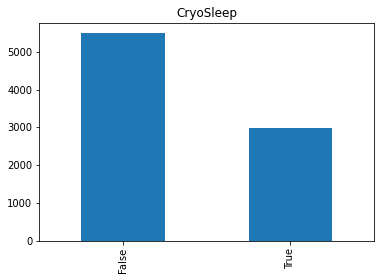

In [ ]:
# Visualização dos dados
df_train_clean['CryoSleep2'].value_counts().plot.bar(title='CryoSleep')

## Campo Cabin

- Com dados nulos
- Criação de novas colunas:
 - CabinMode - contém a moda de Cabin por grupo de passageiros
 - Cabin2 - contém os dados de Cabin após tratamento
- Imputação de dados por:
 1. Moda do grupo de passageiros
- Criação de novas colunas:
 - CabinDeck - contém o deck da cabine
 - CabinNum - contém o número da cabine
 - CabinSide - contém o lado da cabine
- Imputação de dados por:
 1. Moda geral

In [ ]:
# Verificação dos dados
df_train_clean['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['Cabin'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,NullColumns,PassengerGroup,PassengerGroupNumber,Group,HomePlanetMode,HomePlanet2,CryoSleepMode,CryoSleep2
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,...,Justie Pooles,False,1,0012,01,False,Earth,Earth,False,False
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,...,Book Trad,True,1,0101,01,False,Mars,Mars,True,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,...,Graviph Aloubtled,False,1,0110,01,True,Europa,Europa,False,False
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,...,Diedow Resty,False,1,0239,01,False,Mars,Mars,False,False
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,...,Froos Sad,True,1,0244,01,True,Mars,Mars,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,8770_03,Earth,False,NaN,PSO J318.5-22,14.0,False,476.0,14.0,0.0,...,Sony Morgerson,False,1,8770,03,True,Earth,Earth,False,False
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,...,Coxan Statch,False,1,9057,01,True,Europa,Europa,False,False
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,...,Bath Brakeng,True,1,9069,03,True,Europa,Europa,True,True
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,...,Beula Clemondsey,False,1,9081,03,True,Earth,Earth,False,True


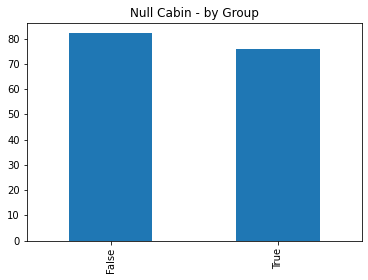

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['Cabin'].isnull()]['Group'].value_counts().plot.bar(title='Null Cabin - by Group')

In [ ]:
# Imputação de dados
df_train_clean['Cabin'].fillna('Lost', inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [ ]:
# Moda de Cabin por grupo
passenger_group = df_train_clean.groupby(['PassengerGroup'])['Cabin'].agg(lambda x: pd.Series.mode(x)[0])
passenger_group

PassengerGroup
0001       B/0/P
0002       F/0/S
0003       A/0/S
0004       F/1/S
0005       F/0/P
          ...   
9275      A/97/P
9276      A/98/P
9278    G/1499/S
9279    G/1500/S
9280     E/608/S
Name: Cabin, Length: 6102, dtype: object

In [ ]:
# Criação da coluna CabinMode
df_train_clean['CabinMode'] = passenger_group.loc[df_train_clean['PassengerGroup']].tolist()
df_train_clean['CabinMode'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [ ]:
# Criação da coluna Cabin2
df_train_clean['Cabin2'] = np.where(df_train_clean['Cabin'] == 'Lost', df_train_clean['CabinMode'], df_train_clean['Cabin'])
df_train_clean['Cabin2'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [ ]:
# Criação das colunas CabinDeck, CabinNum e CabinSide
df_train_clean['CabinDeck'], df_train_clean['CabinNum'], df_train_clean['CabinSide'] = df_train_clean['Cabin2'].str.split('/').str
df_train_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group,HomePlanetMode,HomePlanet2,CryoSleepMode,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,Europa,Europa,False,False,B/0/P,B/0/P,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,False,Earth,Earth,False,False,F/0/S,F/0/S,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,True,Europa,Europa,False,False,A/0/S,A/0/S,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,True,Europa,Europa,False,False,A/0/S,A/0/S,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,False,Earth,Earth,False,False,F/1/S,F/1/S,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,False,Europa,Europa,False,False,A/98/P,A/98/P,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,False,Earth,Earth,True,True,G/1499/S,G/1499/S,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,False,Earth,Earth,False,False,G/1500/S,G/1500/S,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,True,Europa,Europa,False,False,E/608/S,E/608/S,E,608,S


In [ ]:
# Verificação dos dados
df_train_clean['CabinDeck'].unique()

array(['B', 'F', 'A', 'G', 'Lost', 'E', 'D', 'C', 'T'], dtype=object)

In [ ]:
# Verificação dos dados
df_train_clean['CabinNum'].unique()

array(['0', '1', '2', ..., '1891', '1892', '1894'], dtype=object)

In [ ]:
# Verificação dos dados
df_train_clean['CabinSide'].unique()

array(['P', 'S', nan], dtype=object)

In [ ]:
# Ajuste da coluna CabinDeck com imputação da moda geral
cabindeck_mode = df_train_clean['CabinDeck'].mode()
df_train_clean['CabinDeck'] = np.where(df_train_clean['CabinDeck'] == 'Lost', cabindeck_mode, df_train_clean['CabinDeck'])
df_train_clean['CabinDeck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [ ]:
# Ajuste da coluna CabinSide com imputação da moda geral
cabinside_mode = df_train_clean['CabinSide'].mode()
df_train_clean['CabinSide'] = np.where(df_train_clean['CabinSide'].isnull(), cabinside_mode, df_train_clean['CabinSide'])
df_train_clean['CabinSide'].unique()

array(['P', 'S'], dtype=object)

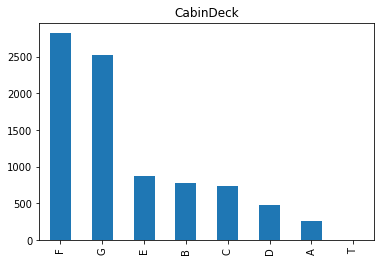

In [ ]:
# Visualização dos dados
df_train_clean['CabinDeck'].value_counts().plot.bar(title='CabinDeck')

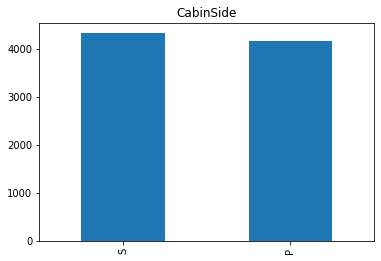

In [ ]:
# Visualização dos dados
df_train_clean['CabinSide'].value_counts().plot.bar(title='CabinSide')

## Campo Destination

- Com dados nulos
- Criação de novas colunas:
 - DestinationMode - contém a moda de Destination por grupo de passageiros
 - Destination2 - contém os dados de HomePlanet após tratamento
- Imputação de dados por:
 1. Moda do grupo de passageiros
 2. Moda geral

In [ ]:
# Verificação dos dados
df_train_clean['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['Destination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group,HomePlanetMode,HomePlanet2,CryoSleepMode,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide
47,0045_02,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,...,True,Mars,Mars,False,True,F/10/P,F/10/P,F,10,P
128,0138_02,Earth,False,E/5/P,NaN,34.0,False,0.0,22.0,0.0,...,True,Earth,Earth,False,False,E/5/P,E/5/P,E,5,P
139,0152_01,Earth,False,F/32/P,NaN,41.0,False,0.0,0.0,0.0,...,False,Earth,Earth,False,False,F/32/P,F/32/P,F,32,P
430,0462_01,Earth,True,G/67/S,NaN,50.0,False,0.0,0.0,0.0,...,False,Earth,Earth,True,True,G/67/S,G/67/S,G,67,S
468,0504_03,Europa,True,B/19/S,NaN,24.0,False,0.0,0.0,0.0,...,True,Europa,Europa,True,True,B/19/S,B/19/S,B,19,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,Earth,True,G/1453/P,NaN,20.0,False,0.0,0.0,0.0,...,True,Earth,Earth,False,True,F/1838/P,G/1453/P,G,1453,P
8551,9130_01,Mars,True,F/1765/S,NaN,41.0,False,0.0,0.0,0.0,...,False,Mars,Mars,True,True,F/1765/S,F/1765/S,F,1765,S
8616,9195_02,Mars,True,F/1779/S,NaN,33.0,False,0.0,0.0,0.0,...,True,Mars,Mars,True,True,F/1779/S,F/1779/S,F,1779,S
8621,9197_02,Europa,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,...,True,Europa,Europa,False,False,C/308/P,C/308/P,C,308,P


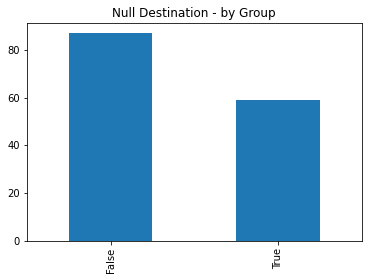

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['Destination'].isnull()]['Group'].value_counts().plot.bar(title='Null Destination - by Group')

In [ ]:
# Imputação de dados
df_train_clean['Destination'].fillna('Lost', inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Lost'],
      dtype=object)

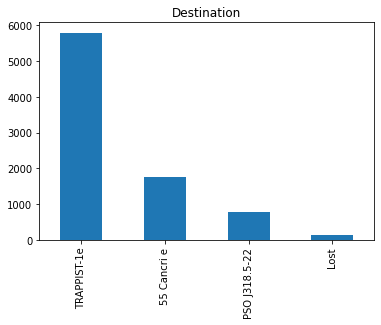

In [ ]:
# Visualização dos dados
df_train_clean['Destination'].value_counts().plot.bar(title='Destination')

In [ ]:
# Moda de Destination por grupo
passenger_group = df_train_clean.groupby(['PassengerGroup'])['Destination'].agg(lambda x: pd.Series.mode(x)[0])
passenger_group

PassengerGroup
0001      TRAPPIST-1e
0002      TRAPPIST-1e
0003      TRAPPIST-1e
0004      TRAPPIST-1e
0005    PSO J318.5-22
            ...      
9275      TRAPPIST-1e
9276      55 Cancri e
9278    PSO J318.5-22
9279      TRAPPIST-1e
9280      55 Cancri e
Name: Destination, Length: 6102, dtype: object

In [ ]:
# Criação da coluna DestinationMode
df_train_clean['DestinationMode'] = passenger_group.loc[df_train_clean['PassengerGroup']].tolist()
df_train_clean['DestinationMode'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Lost'],
      dtype=object)

In [ ]:
# Criação da coluna Destination2
df_train_clean['Destination2'] = np.where(df_train_clean['Destination'] == 'Lost', df_train_clean['DestinationMode'], df_train_clean['Destination'])
df_train_clean['Destination2'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Lost'],
      dtype=object)

In [ ]:
# Ajuste da coluna HomePlanet2 com imputação da moda geral
destination_mode = df_train_clean['Destination2'].mode()
df_train_clean['Destination2'] = np.where(df_train_clean['Destination2'] == 'Lost', destination_mode, df_train_clean['Destination2'])
df_train_clean['Destination2'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

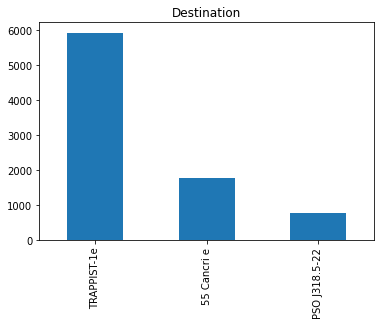

In [ ]:
# Visualização dos dados
df_train_clean['Destination2'].value_counts().plot.bar(title='Destination')

## Campo Age

- Com dados nulos
- Imputação de dados por:
 1. Moda geral

In [ ]:
# Verificação dos dados
df_train_clean['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['Age'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,HomePlanet2,CryoSleepMode,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide,DestinationMode,Destination2
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,...,Earth,False,False,G/6/S,G/6/S,G,6,S,TRAPPIST-1e,TRAPPIST-1e
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,...,Mars,False,False,E/4/S,E/4/S,E,4,S,TRAPPIST-1e,TRAPPIST-1e
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Earth,True,True,G/27/S,G/27/S,G,27,S,55 Cancri e,55 Cancri e
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,...,Europa,False,False,C/9/S,C/9/S,C,9,S,55 Cancri e,55 Cancri e
249,0275_01,Europa,True,D/9/S,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Europa,True,True,D/9/S,D/9/S,D,9,S,55 Cancri e,55 Cancri e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,Earth,True,True,G/1425/S,G/1425/S,G,1425,S,TRAPPIST-1e,TRAPPIST-1e
8301,8862_03,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,Europa,True,True,C/329/S,C/329/S,C,329,S,55 Cancri e,TRAPPIST-1e
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,...,Earth,False,False,F/1838/P,G/1453/P,G,1453,P,TRAPPIST-1e,TRAPPIST-1e
8407,8988_01,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,Earth,True,True,G/1448/S,G/1448/S,G,1448,S,TRAPPIST-1e,TRAPPIST-1e


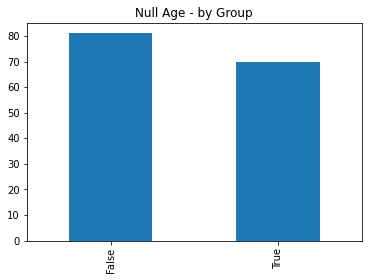

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['Age'].isnull()]['Group'].value_counts().plot.bar(title='Null Age - by Group')

In [ ]:
# Imputação de dados
df_train_clean['Age'].fillna(floor(df_train_clean['Age'].mean()), inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., 25., 38., 36.,
       22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64., 67.,
       61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5., 79.,
       68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66., 69.,
       72., 77.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedd46aad0>]],
      dtype=object)

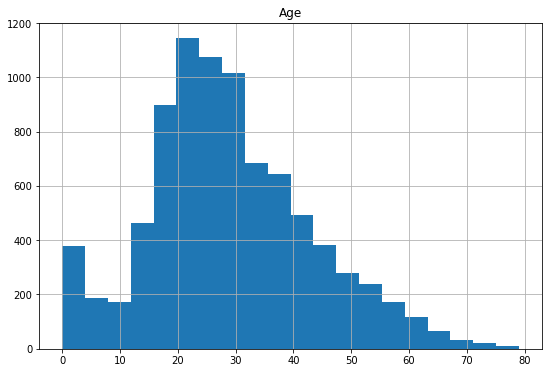

In [ ]:
# Visualização dos dados
df_train_clean.hist(column='Age', figsize=(9,6), bins=20)

## Campo VIP

- Com dados nulos
- Criação de novas colunas:
 - VIPMode - contém a moda de VIP por grupo de passageiros
 - VIP2 - contém os dados de CryoSleep após tratamento
- Imputação de dados por:
 1. Moda do grupo de passageiros
 2. Moda geral

In [ ]:
# Verificação dos dados
df_train_clean['VIP'].unique()

array([False, True, nan], dtype=object)

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,HomePlanet2,CryoSleepMode,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide,DestinationMode,Destination2
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,...,Earth,False,False,F/8/S,F/8/S,F,8,S,55 Cancri e,55 Cancri e
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,...,Earth,False,False,G/19/S,G/19/S,G,19,S,TRAPPIST-1e,TRAPPIST-1e
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,...,Mars,True,True,F/37/P,F/37/P,F,37,P,TRAPPIST-1e,TRAPPIST-1e
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,...,Mars,True,True,F/47/S,F/47/S,F,47,S,55 Cancri e,55 Cancri e
582,0607_01,Europa,False,C/22/P,TRAPPIST-1e,37.0,NaN,27.0,654.0,10.0,...,Europa,False,False,C/22/P,C/22/P,C,22,P,TRAPPIST-1e,TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8428,9003_01,Earth,False,F/1744/S,TRAPPIST-1e,23.0,NaN,2.0,167.0,0.0,...,Earth,False,False,F/1744/S,F/1744/S,F,1744,S,TRAPPIST-1e,TRAPPIST-1e
8430,9006_01,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,...,Europa,True,True,B/343/S,B/343/S,B,343,S,TRAPPIST-1e,TRAPPIST-1e
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,...,Earth,False,False,G/1476/P,F/1858/P,F,1858,P,TRAPPIST-1e,PSO J318.5-22
8542,9122_01,Earth,True,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,...,Earth,True,True,G/1469/S,G/1469/S,G,1469,S,55 Cancri e,55 Cancri e


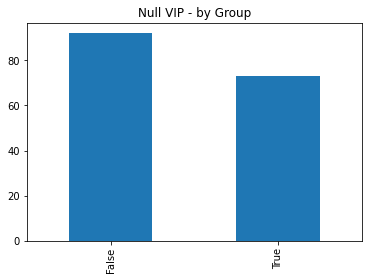

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['VIP'].isnull()]['Group'].value_counts().plot.bar(title='Null VIP - by Group')

In [ ]:
# Imputação de dados
df_train_clean['VIP'].fillna('Lost', inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['VIP'].unique()

array([False, True, 'Lost'], dtype=object)

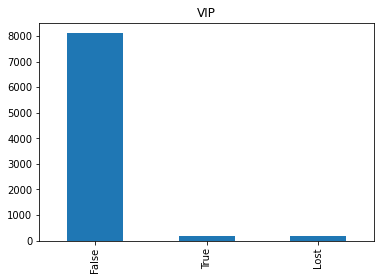

In [ ]:
# Visualização dos dados
df_train_clean['VIP'].value_counts().plot.bar(title='VIP')

In [ ]:
# Moda de VIP por grupo
passenger_group = df_train_clean.groupby(['PassengerGroup'])['VIP'].agg(lambda x: pd.Series.mode(x)[0])
passenger_group

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'bool'
  warn(f"Unable to sort modes: {err}")
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'bool' and 'str'
  warn(f"Unable to sort modes: {err}")


PassengerGroup
0001    False
0002    False
0003    False
0004    False
0005    False
        ...  
9275    False
9276     True
9278    False
9279    False
9280    False
Name: VIP, Length: 6102, dtype: object

In [ ]:
# Criação da coluna VIPMode
df_train_clean['VIPMode'] = passenger_group.loc[df_train_clean['PassengerGroup']].tolist()
df_train_clean['VIPMode'].unique()

array([False, 'Lost', True], dtype=object)

In [ ]:
# Criação da coluna VIP2
df_train_clean['VIP2'] = np.where(df_train_clean['VIP'] == 'Lost', df_train_clean['VIPMode'], df_train_clean['VIP'])
df_train_clean['VIP2'].unique()

array([False, True, 'Lost'], dtype=object)

In [ ]:
# Ajuste da coluna VIP2 com imputação da moda geral
vip_mode = df_train_clean['VIP2'].mode()
df_train_clean['VIP2'] = np.where(df_train_clean['VIP2'] == 'Lost', vip_mode, df_train_clean['VIP2'])
df_train_clean['VIP2'].unique()

array([False, True], dtype=object)

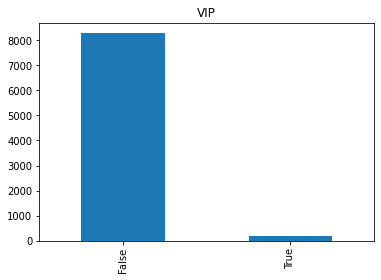

In [ ]:
# Visualização dos dados
df_train_clean['VIP2'].value_counts().plot.bar(title='VIP')

## Campo RoomService

- Com dados nulos
- Imputação de dados por:
 1. Constante 0 (zero)

In [ ]:
# Verificação dos dados
df_train_clean['RoomService'].unique()

array([   0.,  109.,   43., ..., 1003., 8586.,  745.])

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['RoomService'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide,DestinationMode,Destination2,VIPMode,VIP2
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,...,True,E/0/S,E/0/S,E,0,S,TRAPPIST-1e,PSO J318.5-22,False,False
35,0031_03,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,...,False,F/9/P,F/9/P,F,9,P,TRAPPIST-1e,TRAPPIST-1e,False,False
83,0091_01,Earth,True,G/16/S,TRAPPIST-1e,26.0,False,NaN,0.0,0.0,...,True,F/20/S,G/16/S,G,16,S,TRAPPIST-1e,TRAPPIST-1e,False,False
132,0141_01,Mars,False,F/30/P,TRAPPIST-1e,31.0,False,NaN,0.0,97.0,...,False,F/30/P,F/30/P,F,30,P,TRAPPIST-1e,TRAPPIST-1e,False,False
170,0193_02,Mars,False,F/41/P,TRAPPIST-1e,23.0,False,NaN,0.0,8.0,...,False,F/41/P,F/41/P,F,41,P,TRAPPIST-1e,TRAPPIST-1e,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8412,8988_06,Earth,True,G/1448/S,TRAPPIST-1e,17.0,False,NaN,0.0,0.0,...,True,G/1448/S,G/1448/S,G,1448,S,TRAPPIST-1e,TRAPPIST-1e,False,False
8425,8998_02,Earth,False,E/591/S,TRAPPIST-1e,47.0,False,NaN,1.0,0.0,...,False,E/591/S,E/591/S,E,591,S,TRAPPIST-1e,TRAPPIST-1e,False,False
8450,9026_01,Earth,True,G/1463/P,TRAPPIST-1e,58.0,False,NaN,0.0,0.0,...,True,G/1463/P,G/1463/P,G,1463,P,TRAPPIST-1e,TRAPPIST-1e,False,False
8525,9101_01,Earth,False,F/1865/P,TRAPPIST-1e,21.0,False,NaN,0.0,496.0,...,False,F/1865/P,F/1865/P,F,1865,P,TRAPPIST-1e,TRAPPIST-1e,False,False


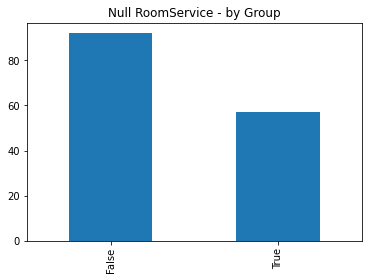

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['RoomService'].isnull()]['Group'].value_counts().plot.bar(title='Null RoomService - by Group')

In [ ]:
# Imputação de dados
df_train_clean['RoomService'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['RoomService'].unique()

array([   0.,  109.,   43., ..., 1003., 8586.,  745.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedd1e4410>]],
      dtype=object)

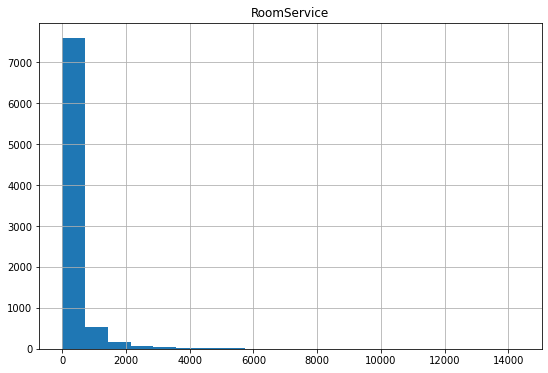

In [ ]:
# Visualização dos dados
df_train_clean.hist(column='RoomService', figsize=(9,6), bins=20)

## Campo FoodCourt

- Com dados nulos
- Imputação de dados por:
 1. Constante 0 (zero)

In [ ]:
# Verificação dos dados
df_train_clean['FoodCourt'].unique()

array([   0.,    9., 3576., ..., 3208., 6819., 4688.])

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['FoodCourt'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide,DestinationMode,Destination2,VIPMode,VIP2
95,0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,...,False,G/18/S,F/24/S,F,24,S,TRAPPIST-1e,TRAPPIST-1e,False,False
218,0232_01,Earth,True,G/36/S,PSO J318.5-22,27.0,False,0.0,NaN,0.0,...,True,G/36/S,G/36/S,G,36,S,PSO J318.5-22,PSO J318.5-22,False,False
367,0405_01,Earth,False,F/89/P,55 Cancri e,17.0,False,177.0,NaN,0.0,...,False,F/89/P,F/89/P,F,89,P,55 Cancri e,55 Cancri e,False,False
385,0427_01,Europa,False,E/26/P,TRAPPIST-1e,31.0,False,417.0,NaN,7185.0,...,False,E/26/P,E/26/P,E,26,P,TRAPPIST-1e,TRAPPIST-1e,False,False
574,0599_02,Mars,False,F/124/P,TRAPPIST-1e,4.0,False,0.0,NaN,0.0,...,False,F/124/P,F/124/P,F,124,P,TRAPPIST-1e,TRAPPIST-1e,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,8964_01,Mars,False,F/1734/S,TRAPPIST-1e,28.0,False,1708.0,NaN,65.0,...,False,F/1734/S,F/1734/S,F,1734,S,TRAPPIST-1e,TRAPPIST-1e,False,False
8393,8972_01,Mars,True,F/1736/S,TRAPPIST-1e,34.0,False,0.0,NaN,0.0,...,True,F/1736/S,F/1736/S,F,1736,S,TRAPPIST-1e,TRAPPIST-1e,False,False
8396,8975_02,Earth,False,F/1840/P,TRAPPIST-1e,27.0,False,1.0,NaN,0.0,...,False,F/1840/P,F/1840/P,F,1840,P,TRAPPIST-1e,TRAPPIST-1e,False,False
8422,8997_01,Earth,True,F/1742/S,55 Cancri e,15.0,False,0.0,NaN,0.0,...,True,F/1742/S,F/1742/S,F,1742,S,55 Cancri e,55 Cancri e,False,False


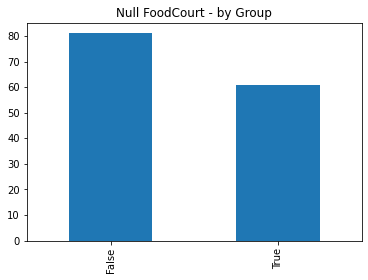

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['FoodCourt'].isnull()]['Group'].value_counts().plot.bar(title='Null FoodCourt - by Group')

In [ ]:
# Imputação de dados
df_train_clean['FoodCourt'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['FoodCourt'].unique()

array([   0.,    9., 3576., ..., 3208., 6819., 4688.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedd0b02d0>]],
      dtype=object)

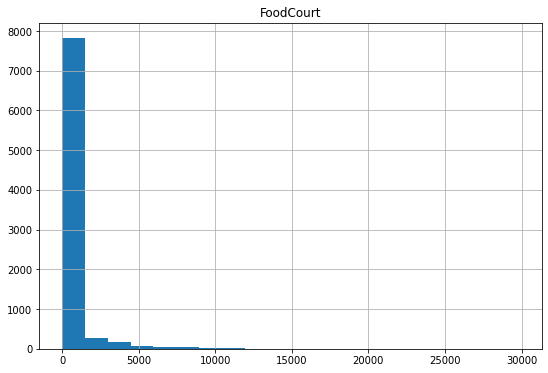

In [ ]:
# Visualização dos dados
df_train_clean.hist(column='FoodCourt', figsize=(9,6), bins=20)

## Campo ShoppingMall

- Com dados nulos
- Imputação de dados por:
 1. Constante 0 (zero)

In [ ]:
# Verificação dos dados
df_train_clean['ShoppingMall'].unique()

array([   0.,   25.,  371., ..., 1085.,  510., 1872.])

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['ShoppingMall'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide,DestinationMode,Destination2,VIPMode,VIP2
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,...,True,B/1/P,B/1/P,B,1,P,55 Cancri e,TRAPPIST-1e,False,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,...,False,F/3/P,F/3/P,F,3,P,55 Cancri e,55 Cancri e,False,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,...,True,E/0/S,E/0/S,E,0,S,TRAPPIST-1e,55 Cancri e,False,False
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,NaN,...,True,C/2/S,C/2/S,C,2,S,TRAPPIST-1e,TRAPPIST-1e,False,False
40,0039_01,Earth,True,G/1/P,55 Cancri e,30.0,False,0.0,0.0,NaN,...,True,G/1/P,G/1/P,G,1,P,55 Cancri e,55 Cancri e,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,9179_03,Earth,True,G/1494/P,PSO J318.5-22,18.0,False,0.0,0.0,NaN,...,True,G/1494/P,G/1494/P,G,1494,P,TRAPPIST-1e,PSO J318.5-22,False,False
8607,9186_01,Mars,True,F/1878/P,TRAPPIST-1e,2.0,False,0.0,0.0,NaN,...,True,F/1878/P,F/1878/P,F,1878,P,TRAPPIST-1e,TRAPPIST-1e,False,False
8633,9211_01,Earth,False,G/1486/S,TRAPPIST-1e,60.0,False,0.0,8.0,NaN,...,False,G/1486/S,G/1486/S,G,1486,S,TRAPPIST-1e,TRAPPIST-1e,False,False
8641,9220_03,Earth,False,F/1886/P,PSO J318.5-22,22.0,False,623.0,0.0,NaN,...,False,G/1496/P,F/1886/P,F,1886,P,TRAPPIST-1e,PSO J318.5-22,False,False


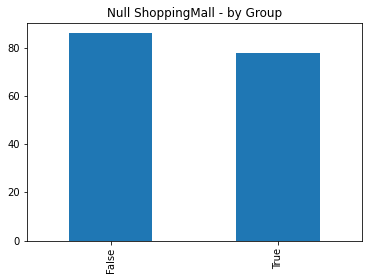

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['ShoppingMall'].isnull()]['Group'].value_counts().plot.bar(title='Null ShoppingMall - by Group')

In [ ]:
# Imputação de dados
df_train_clean['ShoppingMall'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['ShoppingMall'].unique()

array([   0.,   25.,  371., ..., 1085.,  510., 1872.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedcfca450>]],
      dtype=object)

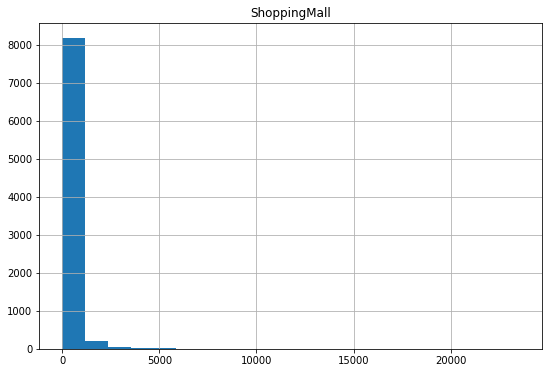

In [ ]:
# Visualização dos dados
df_train_clean.hist(column='ShoppingMall', figsize=(9,6), bins=20)

## Campo Spa

- Com dados nulos
- Imputação de dados por:
 1. Constante 0 (zero)

In [ ]:
# Verificação dos dados
df_train_clean['Spa'].unique()

array([   0.,  549., 6715., ..., 2868., 1107., 1643.])

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['Spa'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide,DestinationMode,Destination2,VIPMode,VIP2
48,0050_01,Earth,False,E/1/S,55 Cancri e,35.0,False,790.0,0.0,0.0,...,False,E/1/S,E/1/S,E,1,S,55 Cancri e,55 Cancri e,False,False
143,0164_01,Earth,False,G/28/S,TRAPPIST-1e,57.0,False,50.0,1688.0,0.0,...,False,G/28/S,G/28/S,G,28,S,PSO J318.5-22,TRAPPIST-1e,False,False
245,0265_01,Europa,True,D/8/S,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,True,D/8/S,D/8/S,D,8,S,TRAPPIST-1e,TRAPPIST-1e,False,False
269,0294_01,Europa,True,B/8/S,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,...,True,B/8/S,B/8/S,B,8,S,TRAPPIST-1e,TRAPPIST-1e,False,False
289,0320_01,Earth,False,G/44/S,TRAPPIST-1e,18.0,False,0.0,2.0,0.0,...,False,G/44/S,G/44/S,G,44,S,TRAPPIST-1e,TRAPPIST-1e,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,9041_01,Earth,True,G/1470/P,PSO J318.5-22,30.0,False,0.0,0.0,0.0,...,True,G/1470/P,G/1470/P,G,1470,P,PSO J318.5-22,PSO J318.5-22,False,False
8554,9132_01,Mars,False,D/291/P,TRAPPIST-1e,31.0,False,2575.0,1.0,2.0,...,False,D/291/P,D/291/P,D,291,P,TRAPPIST-1e,TRAPPIST-1e,False,False
8566,9149_01,Europa,True,B/350/S,55 Cancri e,37.0,False,0.0,0.0,0.0,...,True,B/350/S,B/350/S,B,350,S,55 Cancri e,55 Cancri e,False,False
8569,9151_01,Mars,True,F/1769/S,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,...,True,F/1769/S,F/1769/S,F,1769,S,TRAPPIST-1e,TRAPPIST-1e,False,False


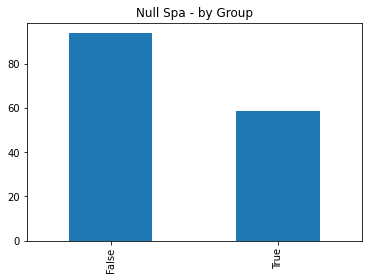

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['Spa'].isnull()]['Group'].value_counts().plot.bar(title='Null Spa - by Group')

In [ ]:
# Imputação de dados
df_train_clean['Spa'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['Spa'].unique()

array([   0.,  549., 6715., ..., 2868., 1107., 1643.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedd7ce1d0>]],
      dtype=object)

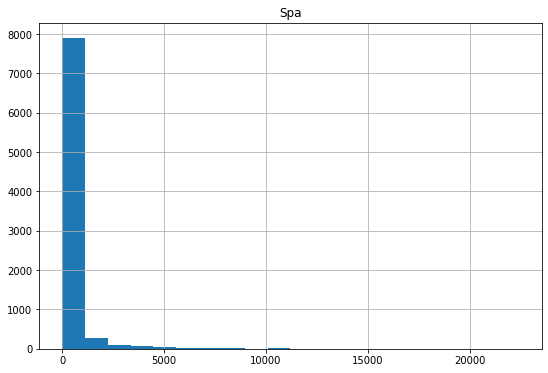

In [ ]:
# Visualização dos dados
df_train_clean.hist(column='Spa', figsize=(9,6), bins=20)

## Campo VRDeck

- Com dados nulos
- Imputação de dados por:
 1. Constante 0 (zero)

In [ ]:
# Verificação dos dados
df_train_clean['VRDeck'].unique()

array([   0.,   44.,   49., ..., 1164.,  971., 3235.])

In [ ]:
# Visualização dos dados faltantes
df_train_clean[df_train_clean['VRDeck'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CryoSleep2,CabinMode,Cabin2,CabinDeck,CabinNum,CabinSide,DestinationMode,Destination2,VIPMode,VIP2
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,True,F/2/S,G/0/S,G,0,S,TRAPPIST-1e,TRAPPIST-1e,False,False
115,0120_01,Mars,True,F/25/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,...,True,F/25/P,F/25/P,F,25,P,TRAPPIST-1e,TRAPPIST-1e,False,False
288,0316_02,Europa,True,B/9/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,...,True,B/9/S,B/9/S,B,9,S,TRAPPIST-1e,TRAPPIST-1e,False,False
290,0320_02,Earth,False,G/44/S,TRAPPIST-1e,21.0,False,0.0,5.0,3.0,...,False,G/44/S,G/44/S,G,44,S,TRAPPIST-1e,TRAPPIST-1e,False,False
437,0470_01,Mars,True,F/86/S,55 Cancri e,25.0,False,0.0,0.0,0.0,...,True,F/86/S,F/86/S,F,86,S,55 Cancri e,55 Cancri e,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8345,8920_01,Europa,False,D/280/P,TRAPPIST-1e,26.0,False,0.0,70.0,0.0,...,False,D/280/P,D/280/P,D,280,P,TRAPPIST-1e,TRAPPIST-1e,False,False
8404,8986_01,Earth,False,E/590/S,TRAPPIST-1e,19.0,False,0.0,810.0,21.0,...,False,E/590/S,E/590/S,E,590,S,PSO J318.5-22,TRAPPIST-1e,False,False
8408,8988_02,Earth,True,G/1448/S,55 Cancri e,17.0,False,0.0,0.0,0.0,...,True,G/1448/S,G/1448/S,G,1448,S,TRAPPIST-1e,55 Cancri e,False,False
8642,9221_01,Earth,True,G/1497/P,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,...,True,G/1497/P,G/1497/P,G,1497,P,TRAPPIST-1e,TRAPPIST-1e,False,False


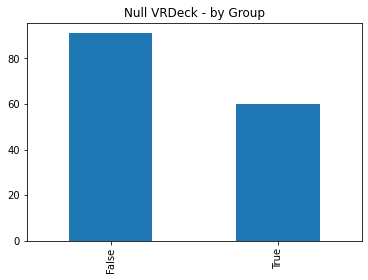

In [ ]:
# Visualização dos dados faltantes por Group
df_train_clean[df_train_clean['VRDeck'].isnull()]['Group'].value_counts().plot.bar(title='Null VRDeck - by Group')

In [ ]:
# Imputação de dados
df_train_clean['VRDeck'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_train_clean['VRDeck'].unique()

array([   0.,   44.,   49., ..., 1164.,  971., 3235.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedcdb3050>]],
      dtype=object)

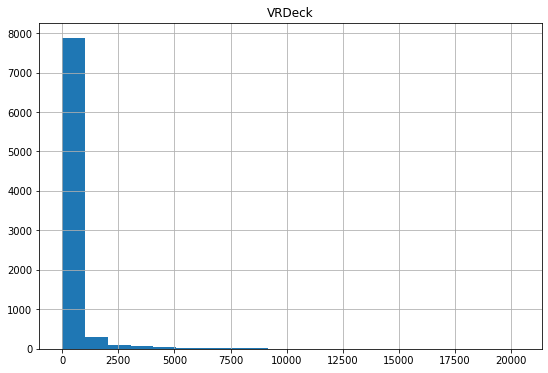

In [ ]:
# Visualização dos dados
df_train_clean.hist(column='VRDeck', figsize=(9,6), bins=20)

## Campo Transported

In [ ]:
# Verificação dos dados
df_train_clean['Transported'].unique()

array([False,  True])

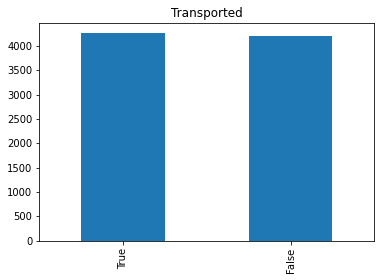

In [ ]:
# Visualização dos dados
df_train_clean['Transported'].value_counts().plot.bar(title='Transported')

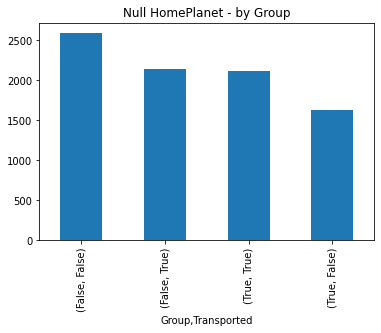

In [ ]:
# Visualização dos dados
df_train_clean.groupby('Group')['Transported'].value_counts().plot.bar(title='Null HomePlanet - by Group')

## Dataset final

In [ ]:
# Criação do dataset final
df_train_final = df_train_clean[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'HomePlanet2', 'CryoSleep2', 'CabinDeck', 'CabinSide', 'Destination2', 'VIP2', 'Transported']]
df_train_final.loc[:, 'Group'] = df_train_final['Group'].astype(object)
df_train_final.loc[:, 'VIP2'] = df_train_final['VIP2'].astype(object)
df_train_final.loc[:, 'Transported'] = df_train_final['Transported'].astype(object)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Renomeação dos campos
df_train_final.rename(columns={'HomePlanet2': 'HomePlanet', 'CryoSleep2': 'CryoSleep', 'Destination2': 'Destination', 'VIP2': 'VIP'}, inplace=True)
df_train_final

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,HomePlanet,CryoSleep,CabinDeck,CabinSide,Destination,VIP,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False,Europa,False,B,P,TRAPPIST-1e,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,Earth,False,F,S,TRAPPIST-1e,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,Europa,False,A,S,TRAPPIST-1e,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,True,Europa,False,A,S,TRAPPIST-1e,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,Earth,False,F,S,TRAPPIST-1e,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,Europa,False,A,P,55 Cancri e,True,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,Earth,True,G,S,PSO J318.5-22,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,Earth,False,G,S,TRAPPIST-1e,False,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,True,Europa,False,E,S,55 Cancri e,False,False


In [ ]:
# Cabeçalho
df_train_final.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,HomePlanet,CryoSleep,CabinDeck,CabinSide,Destination,VIP,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False,Europa,False,B,P,TRAPPIST-1e,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,Earth,False,F,S,TRAPPIST-1e,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,Europa,False,A,S,TRAPPIST-1e,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,True,Europa,False,A,S,TRAPPIST-1e,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,Earth,False,F,S,TRAPPIST-1e,False,True


In [ ]:
# Rodapé
df_train_final.tail(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,HomePlanet,CryoSleep,CabinDeck,CabinSide,Destination,VIP,Transported
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,Europa,False,A,P,55 Cancri e,True,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,Earth,True,G,S,PSO J318.5-22,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,Earth,False,G,S,TRAPPIST-1e,False,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,True,Europa,False,E,S,55 Cancri e,False,False
8692,44.0,126.0,4688.0,0.0,0.0,12.0,True,Europa,False,E,S,TRAPPIST-1e,False,True


In [ ]:
# Número de linhas e colunas
df_train_final.shape

(8473, 14)

In [ ]:
# Informações
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8473 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8473 non-null   float64
 1   RoomService   8473 non-null   float64
 2   FoodCourt     8473 non-null   float64
 3   ShoppingMall  8473 non-null   float64
 4   Spa           8473 non-null   float64
 5   VRDeck        8473 non-null   float64
 6   Group         8473 non-null   object 
 7   HomePlanet    8473 non-null   object 
 8   CryoSleep     8473 non-null   object 
 9   CabinDeck     8473 non-null   object 
 10  CabinSide     8473 non-null   object 
 11  Destination   8473 non-null   object 
 12  VIP           8473 non-null   object 
 13  Transported   8473 non-null   object 
dtypes: float64(6), object(8)
memory usage: 992.9+ KB


In [ ]:
# Dados faltantes
df_train_final.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
HomePlanet      0
CryoSleep       0
CabinDeck       0
CabinSide       0
Destination     0
VIP             0
Transported     0
dtype: int64

In [ ]:
# Estatística descritiva - Campos numéricos
df_train_final.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8473.000000,8473.000000,8473.000000,8473.000000,8473.00000,8473.000000
mean,28.841260,220.394665,453.256934,170.269798,308.07636,296.440812
std,14.321256,660.193003,1606.130741,598.769387,1135.68243,1107.621444
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,37.000000,42.000000,65.000000,23.000000,56.00000,41.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.00000,20336.000000


In [ ]:
# Estatística descritiva - Campos não-numérico
df_train_final.select_dtypes(include='object').describe()

,Group,HomePlanet,CryoSleep,CabinDeck,CabinSide,Destination,VIP,Transported
count,8473,8473,8473,8473,8473,8473,8473,8473
unique,2,3,2,8,2,3,2,2
top,False,Earth,False,F,S,TRAPPIST-1e,False,True
freq,4735,4631,5487,2823,4317,5922,8278,4258


# Modelos

## Preparação dos dados

In [ ]:
# Definição da semente de aleatoriedade
seed = 123

In [ ]:
# Binarização dos atributos (categóricos)
x_train_dict = df_train_final.iloc[:,df_train_final.columns != 'Transported'].T.to_dict().values()
vect_train = DictVectorizer(sparse=False)
x_train = vect_train.fit_transform(x_train_dict)
x_train

array([[3.900e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.400e+01, 0.000e+00, 0.000e+00, ..., 5.490e+02, 0.000e+00,
        4.400e+01],
       [5.800e+01, 1.000e+00, 0.000e+00, ..., 6.715e+03, 1.000e+00,
        4.900e+01],
       ...,
       [2.600e+01, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.200e+01, 0.000e+00, 0.000e+00, ..., 3.530e+02, 0.000e+00,
        3.235e+03],
       [4.400e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.200e+01]])

In [ ]:
# Visualização dos atributos
vect_train.feature_names_

['Age',
 'CabinDeck=A',
 'CabinDeck=B',
 'CabinDeck=C',
 'CabinDeck=D',
 'CabinDeck=E',
 'CabinDeck=F',
 'CabinDeck=G',
 'CabinDeck=T',
 'CabinSide=P',
 'CabinSide=S',
 'CryoSleep',
 'Destination=55 Cancri e',
 'Destination=PSO J318.5-22',
 'Destination=TRAPPIST-1e',
 'FoodCourt',
 'Group',
 'HomePlanet=Earth',
 'HomePlanet=Europa',
 'HomePlanet=Mars',
 'RoomService',
 'ShoppingMall',
 'Spa',
 'VIP',
 'VRDeck']

In [ ]:
# Codificação dos rótulos
le_train = LabelEncoder()
y_train = le_train.fit_transform(df_train_final["Transported"])
y_train

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
# Visualização dos rótulos
le_train.classes_

array([False, True], dtype=object)

In [ ]:
# Particionamento dos dados em treinamento e validação
x_split_train, x_split_test, y_split_train, y_split_test = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

## Árvore de decisão

In [ ]:
# Treinamento do modelo
tree = DecisionTreeClassifier(random_state=seed)
tree = tree.fit(x_split_train, y_split_train)
tree

DecisionTreeClassifier(random_state=123)

In [ ]:
# Predição na base de treinamento
y_split_train_pred = tree.predict(x_split_train)
y_split_train_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento):", tree.score(x_split_train, y_split_train))

Acurácia (base de treinamento): 0.9560342283859545


In [ ]:
# Predição na base de validação
y_split_test_pred = tree.predict(x_split_test)
y_split_test_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação):", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação): 0.735693215339233


<font color=red>Ocorrência de overfitting</br>
Acurácia de treinamento bem maior que a de validação</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.75      0.73      0.74       862
        True       0.72      0.75      0.73       833

    accuracy                           0.74      1695
   macro avg       0.74      0.74      0.74      1695
weighted avg       0.74      0.74      0.74      1695



<font color=red>Modelo consistente/equilibrado</font>

### Ajuste de hiperparâmetros com random search

In [ ]:
# Visualização dos hiperparâmetros atuais
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
# Definição dos hiperparâmetros para a random search
tree_params = {"max_depth": np.arange(2, 15),
               "criterion": ["gini", "entropy"],
               "min_samples_split": np.arange(2, 10),
               "min_samples_leaf": np.arange(2, 10)}

In [ ]:
# Execução da random search
tree_random_search = RandomizedSearchCV(tree,
                                        param_distributions=tree_params,
                                        n_iter=100,
                                        cv=5,
                                        random_state=seed)
tree_random_search.fit(x_split_train, y_split_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=123)

In [ ]:
# Visualização dos melhores hiperparâmetros encontrados
tree_random = tree_random_search.best_estimator_
tree_random.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento):",tree_random.score(x_split_train, y_split_train))

Acurácia (base de treinamento): 0.8152847447624668


In [ ]:
# Predição na base de validação
y_split_test_pred = tree_random.predict(x_split_test)
y_split_test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação):", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação): 0.7699115044247787


<font color='red'>Melhora da acurácia de validação e redução do overfitting</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.77      0.78      0.78       862
        True       0.77      0.76      0.76       833

    accuracy                           0.77      1695
   macro avg       0.77      0.77      0.77      1695
weighted avg       0.77      0.77      0.77      1695



<font color=red>Modelo consistente/equilibrado</font>

## Floresta aleatória

In [ ]:
# Treinamento do modelo
forest = RandomForestClassifier(n_estimators=100,random_state=seed)
forest = forest.fit(x_split_train, y_split_train)
forest

RandomForestClassifier(random_state=123)

In [ ]:
# Predição na base de treinamento
y_split_train_pred = forest.predict(x_split_train)
y_split_train_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento):", forest.score(x_split_train, y_split_train))

Acurácia (base de treinamento): 0.9560342283859545


In [ ]:
# Predição na base de validação
y_split_test_pred = forest.predict(x_split_test)
y_split_test_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação):", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação): 0.7887905604719764


<font color=red>Ocorrência de overfitting</br>
Acurácia de treinamento bem maior que a de validação</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.78      0.82      0.80       862
        True       0.80      0.75      0.78       833

    accuracy                           0.79      1695
   macro avg       0.79      0.79      0.79      1695
weighted avg       0.79      0.79      0.79      1695



<font color=red>Modelo razoavelmente consistente/equilibrado</font>

### Ajuste de hiperparâmetros com random search

In [ ]:
# Visualização dos hiperparâmetros atuais
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Definição dos hiperparâmetros para a random search
forest_params = {"max_depth": np.arange(2, 15),
                 "criterion": ["gini", "entropy"],
                 "min_samples_split": np.arange(2, 10),
                 "min_samples_leaf": np.arange(2, 10),
                 "n_estimators": [25, 50, 100, 150]}

In [ ]:
# Execução da random search
forest_random_search = RandomizedSearchCV(forest,
                                          param_distributions=forest_params,
                                          n_iter=100,
                                          cv=5,
                                          random_state=seed)
forest_random_search.fit(x_split_train, y_split_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [25, 50, 100, 150]},
                   random_state=123)

In [ ]:
# Visualização dos melhores hiperparâmetros encontrados
forest_random = forest_random_search.best_estimator_
forest_random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento): ", forest_random.score(x_split_train, y_split_train))

Acurácia (base de treinamento):  0.8568899380348185


In [ ]:
# Predição na base de validação
y_split_test_pred = forest_random.predict(x_split_test)
y_split_test_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação): ", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação):  0.7935103244837758


<font color='red'>Melhora da acurácia de validação e redução do overfitting</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.80      0.79      0.80       862
        True       0.79      0.79      0.79       833

    accuracy                           0.79      1695
   macro avg       0.79      0.79      0.79      1695
weighted avg       0.79      0.79      0.79      1695



<font color='red'>Modelo consistente/equilibrado</font>

## Regressão logística

In [ ]:
# Treinamento do modelo
log = LogisticRegression(random_state=seed)
log = log.fit(x_split_train, y_split_train)
log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=123)

In [ ]:
# Predição na base de treinamento
y_split_train_pred = log.predict(x_split_train)
y_split_train_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento):", log.score(x_split_train, y_split_train))

Acurácia (base de treinamento): 0.7904986721746828


In [ ]:
# Predição na base de validação
y_split_test_pred = log.predict(x_split_test)
y_split_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação):", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação): 0.7793510324483776


<font color=red>Overfitting desprezível</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.79      0.77      0.78       862
        True       0.77      0.79      0.78       833

    accuracy                           0.78      1695
   macro avg       0.78      0.78      0.78      1695
weighted avg       0.78      0.78      0.78      1695



<font color=red>Modelo consistente/equilibrado</font>

### Ajuste de hiperparâmetros com random search

In [ ]:
# Visualização dos hiperparâmetros atuais
log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Definição dos hiperparâmetros para a random search
log_params = {"fit_intercept": [True, False],
              "max_iter": [100, 250, 500, 1000],
              "tol": [0.001, 0.005, 0.010, .050],
              "solver": ['lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
# Execução da random search
log_random_search = RandomizedSearchCV(log,
                                       param_distributions=log_params,
                                       n_iter=100,
                                       cv=5,
                                       random_state=seed)
log_random_search.fit(x_split_train, y_split_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
                   n_iter=100,
                   param_distributions={'fit_intercept': [True, False],
                                        'max_iter': [100, 250, 500, 1000],
                                        'solver': ['lbfgs', 'liblinear', 'sag',
                                                   'saga'],
                                        'tol': [0.001, 0.005, 0.01, 0.05]},
                   random_state=123)

In [ ]:
# Visualização dos melhores hiperparâmetros encontrados
log_random = log_random_search.best_estimator_
log_random.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.05,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento): ", log_random.score(x_split_train, y_split_train))

Acurácia (base de treinamento):  0.7944821481262909


In [ ]:
# Predição na base de validação
y_split_test_pred = log_random.predict(x_split_test)
y_split_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação): ", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação):  0.7846607669616519


<font color='red'>Ligeira melhora da acurácia de validação e diminuição do overfitting</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.80      0.77      0.78       862
        True       0.77      0.80      0.79       833

    accuracy                           0.78      1695
   macro avg       0.79      0.78      0.78      1695
weighted avg       0.79      0.78      0.78      1695



<font color='red'>Modelo consistente/equilibrado</font>

## Ensemble - Votação

In [ ]:
# Treinamento do modelo
soft_voting = VotingClassifier(estimators=[('dt', tree_random), ('rf', forest_random), ('lr', log_random)],
                               voting='soft')
soft_voting = soft_voting.fit(x_split_train, y_split_train)
soft_voting

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=4,
                                                     min_samples_split=8,
                                                     random_state=123)),
                             ('rf',
                              RandomForestClassifier(max_depth=13,
                                                     min_samples_leaf=5,
                                                     min_samples_split=5,
                                                     random_state=123)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=123, tol=0.05))],
                 voting='soft')

In [ ]:
# Predição na base de treinamento
y_split_train_pred = soft_voting.predict(x_split_train)
y_split_train_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento):", soft_voting.score(x_split_train, y_split_train))

Acurácia (base de treinamento): 0.83475951608144


In [ ]:
# Predição na base de validação
y_split_test_pred = soft_voting.predict(x_split_test)
y_split_test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação):", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação): 0.7882005899705015


<font color='red'>Baixo overfitting</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.80      0.78      0.79       862
        True       0.78      0.80      0.79       833

    accuracy                           0.79      1695
   macro avg       0.79      0.79      0.79      1695
weighted avg       0.79      0.79      0.79      1695



<font color='red'>Modelo consistente/equilibrado</font>

## Ensemble - AdaBoost

In [ ]:
# Treinamento do modelo
ada = AdaBoostClassifier(forest_random,
                         algorithm="SAMME.R",
                         n_estimators=100,
                         random_state=seed)
ada = ada.fit(x_split_train, y_split_train)
ada

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                         min_samples_leaf=5,
                                                         min_samples_split=5,
                                                         random_state=123),
                   n_estimators=100, random_state=123)

In [ ]:
# Predição na base de treinamento
y_split_train_pred = ada.predict(x_split_train)
y_split_train_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Visualização dos hiperparâmetros
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': RandomForestClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=5,
                        random_state=123),
 'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 13,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__min_samples_split': 5,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': 123,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 123}

In [ ]:
# Acurácia na base de treinamento
print("Acurácia (base de treinamento):", ada.score(x_split_train, y_split_train))

Acurácia (base de treinamento): 0.9560342283859545


In [ ]:
# Predição na base de validação
y_split_test_pred = ada.predict(x_split_test)
y_split_test_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Acurácia na base de validação
print("Acurácia (base de validação):", accuracy_score(y_split_test, y_split_test_pred))

Acurácia (base de validação): 0.7823008849557522


<font color=red>Ocorrência de overfitting</br>
Acurácia de treinamento bem maior que a de validação</font>

In [ ]:
# Métricas
print(classification_report(y_split_test, y_split_test_pred, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.77      0.81      0.79       862
        True       0.79      0.76      0.77       833

    accuracy                           0.78      1695
   macro avg       0.78      0.78      0.78      1695
weighted avg       0.78      0.78      0.78      1695



<font color='red'>Modelo razoavelmente consistente/equilibrado</font>

# Teste

## Análise inicial

In [ ]:
# Cabeçalho
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Rodapé
df_test.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [ ]:
# Número de linhas e colunas
df_test.shape

(4277, 13)

In [ ]:
# Informações
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
# Dados faltantes
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Tratamento dos dados

In [ ]:
# Cópia do dataframe
df_test_clean = df_test.copy()

### Campo PassengerID

In [ ]:
# Criação das colunas PassengerGroup e PassengerGroupNumber
df_test_clean['PassengerGroup'], df_test_clean['PassengerGroupNumber'] = df_test_clean['PassengerId'].str.split('_').str
#df_test_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [ ]:
# Contagem de passageiros por grupo
passenger_group = df_test_clean.groupby(['PassengerGroup']).size()
#passenger_group

In [ ]:
# Criação da coluna Group
df_test_clean['Group'] = (passenger_group.loc[df_test_clean['PassengerGroup']] > 1).tolist()
#df_test_clean

In [ ]:
# Verificação dos dados
df_test_clean['Group'].unique()

array([False,  True])

### Campo HomePlanet

In [ ]:
# Imputação de dados
df_test_clean['HomePlanet'].fillna(homeplanet_mode[0], inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['HomePlanet'].unique()

array(['Earth', 'Europa', 'Mars'], dtype=object)

### Campo CryoSleep

In [ ]:
# Imputação de dados
df_test_clean['CryoSleep'].fillna(cryosleep_mode[0], inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['CryoSleep'].unique()

array([ True, False])

### Campo Cabin

In [ ]:
# Criação das colunas CabinDeck, CabinNum e CabinSide
df_test_clean['CabinDeck'], df_test_clean['CabinNum'], df_test_clean['CabinSide'] = df_test_clean['Cabin'].str.split('/').str
#df_test_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [ ]:
# Imputação de dados
df_test_clean['CabinDeck'].fillna(cabindeck_mode[0], inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['CabinDeck'].unique()

array(['G', 'F', 'C', 'B', 'D', 'E', 'A', 'T'], dtype=object)

In [ ]:
# Imputação de dados
df_test_clean['CabinSide'].fillna(cabinside_mode[0], inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['CabinSide'].unique()

array(['S', 'P'], dtype=object)

### Campo Destination

In [ ]:
# Imputação de dados
df_test_clean['Destination'].fillna(destination_mode[0], inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['Destination'].unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], dtype=object)

### Campo Age

In [ ]:
# Imputação de dados
df_test_clean['Age'].fillna(floor(df_train_clean['Age'].mean()), inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['Age'].unique()

array([27., 19., 31., 38., 20., 21., 23., 24., 45., 44., 46., 29., 40.,
       30., 14., 66., 36., 18., 26., 48.,  6., 33., 28.,  1., 17., 34.,
        5., 22., 16.,  7.,  2.,  0., 56., 39., 35.,  8.,  3.,  9., 25.,
       42., 50., 41., 32., 49., 55., 60., 47., 58., 12., 52., 15., 43.,
       54., 70., 37., 59., 61., 63., 53.,  4., 10., 65., 13., 51., 79.,
       74., 67., 69., 57., 72., 75., 11., 73., 71., 64., 62., 78., 77.,
       68.])

### Campo VIP

In [ ]:
# Imputação de dados
df_test_clean['VIP'].fillna(vip_mode[0], inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['VIP'].unique()

array([False,  True])

### Campo RoomService

In [ ]:
# Imputação de dados
df_test_clean['RoomService'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['RoomService'].unique()

array([0.0000e+00, 1.0000e+01, 3.3900e+02, 9.3200e+02, 2.0000e+00,
       2.6000e+01, 3.9000e+01, 1.7840e+03, 2.9300e+02, 5.9800e+02,
       1.4000e+01, 4.8300e+02, 6.6000e+01, 1.0000e+00, 1.0370e+03,
       3.9660e+03, 4.6000e+01, 4.1300e+02, 3.7800e+02, 3.2000e+01,
       8.3200e+02, 3.6200e+02, 7.5600e+02, 1.9700e+02, 6.0000e+00,
       2.6100e+02, 1.6690e+03, 4.4000e+01, 3.3000e+01, 7.1700e+02,
       4.7620e+03, 7.4100e+02, 3.0000e+00, 7.8600e+02, 2.5560e+03,
       1.8600e+02, 1.3400e+03, 6.9600e+02, 1.5420e+03, 1.0800e+02,
       3.1860e+03, 4.1000e+01, 1.0540e+03, 6.0000e+01, 3.0100e+02,
       1.2300e+02, 9.8000e+01, 2.1200e+02, 7.3000e+01, 3.7600e+02,
       5.0000e+00, 1.0310e+03, 3.5600e+02, 6.3800e+02, 1.3950e+03,
       2.3000e+01, 8.0000e+00, 1.3000e+02, 2.7300e+02, 2.8800e+02,
       7.3100e+02, 1.6780e+03, 4.9080e+03, 8.7000e+01, 4.0000e+00,
       7.0800e+02, 6.4200e+02, 6.5800e+02, 2.3900e+02, 1.8900e+02,
       1.2900e+02, 1.2800e+02, 1.0300e+03, 5.3000e+01, 2.4600e

### Campo FoodCourt

In [ ]:
# Imputação de dados
df_test_clean['FoodCourt'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['FoodCourt'].unique()

array([0.0000e+00, 9.0000e+00, 6.6520e+03, 1.6150e+03, 6.3900e+02,
       3.0000e+00, 7.4000e+01, 1.5610e+03, 1.2000e+01, 7.7080e+03,
       1.9250e+03, 8.7800e+02, 6.9770e+03, 6.4520e+03, 8.0000e+00,
       3.4950e+03, 6.1900e+02, 8.7000e+02, 2.0000e+01, 1.7360e+03,
       1.7000e+01, 2.2000e+01, 8.6900e+02, 1.0000e+00, 2.8720e+03,
       3.1500e+02, 5.1400e+02, 4.0200e+02, 8.8530e+03, 4.4000e+01,
       2.6000e+01, 4.6300e+02, 1.1000e+01, 7.7200e+02, 1.5000e+01,
       1.1600e+02, 2.7500e+02, 2.0000e+00, 5.1600e+02, 3.8330e+03,
       2.5273e+04, 1.4420e+03, 3.3400e+02, 8.6000e+01, 1.0000e+01,
       6.7800e+02, 6.2700e+02, 1.1549e+04, 3.4000e+01, 7.5500e+02,
       1.2520e+03, 6.9000e+01, 1.0300e+03, 1.4680e+03, 6.7000e+01,
       1.7040e+03, 7.2200e+02, 5.3800e+02, 2.5100e+02, 1.1920e+03,
       1.8300e+02, 7.5000e+01, 2.1160e+03, 6.0000e+00, 1.3470e+03,
       2.5220e+03, 1.4700e+02, 1.3780e+03, 3.4500e+02, 2.0810e+03,
       6.4420e+03, 7.5200e+02, 5.4700e+02, 1.3300e+02, 9.3520e

### Campo ShoppingMall

In [ ]:
# Imputação de dados
df_test_clean['ShoppingMall'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['ShoppingMall'].unique()

array([0.000e+00, 6.350e+02, 2.630e+02, 1.360e+02, 2.530e+02, 2.430e+02,
       8.000e+00, 2.600e+01, 1.800e+01, 5.273e+03, 1.200e+01, 3.000e+01,
       8.700e+01, 1.350e+02, 1.235e+03, 1.585e+03, 9.970e+02, 3.900e+01,
       8.200e+01, 2.000e+00, 5.710e+02, 2.305e+03, 1.000e+00, 6.108e+03,
       2.300e+01, 5.210e+02, 1.480e+02, 7.050e+02, 1.175e+03, 1.404e+03,
       2.060e+02, 2.420e+02, 5.650e+02, 4.000e+00, 8.098e+03, 2.200e+01,
       7.800e+01, 7.280e+02, 2.839e+03, 4.620e+02, 1.380e+02, 4.100e+01,
       7.022e+03, 7.900e+01, 1.299e+03, 4.220e+02, 1.320e+02, 8.100e+01,
       1.026e+03, 2.880e+02, 7.000e+00, 7.550e+02, 2.590e+02, 6.100e+02,
       4.391e+03, 7.370e+02, 1.247e+03, 3.000e+00, 9.320e+02, 5.170e+02,
       6.700e+01, 2.219e+03, 1.000e+01, 7.590e+02, 4.870e+02, 6.252e+03,
       4.410e+02, 2.000e+01, 1.970e+02, 8.580e+02, 2.736e+03, 5.410e+02,
       6.870e+02, 1.022e+03, 3.710e+02, 6.300e+01, 1.310e+02, 6.720e+02,
       2.427e+03, 9.900e+01, 1.023e+03, 5.500e+01, 

### Campo Spa

In [ ]:
# Imputação de dados
df_test_clean['Spa'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['Spa'].unique()

array([0.0000e+00, 2.8230e+03, 1.8100e+02, 1.1300e+02, 2.3700e+02,
       7.0000e+00, 1.4000e+01, 1.6870e+03, 9.0300e+02, 4.5700e+02,
       5.6900e+02, 3.1440e+03, 3.0000e+00, 1.6090e+03, 4.0000e+00,
       1.4090e+03, 1.8000e+01, 1.1800e+02, 2.1400e+02, 2.6500e+02,
       8.6600e+02, 5.9900e+02, 1.0000e+00, 3.6000e+01, 2.9000e+01,
       7.2300e+02, 1.2130e+03, 1.5020e+03, 2.1000e+01, 7.5600e+02,
       4.6500e+02, 4.5720e+03, 1.5500e+02, 1.2767e+04, 2.0000e+00,
       1.5310e+03, 1.3000e+01, 1.8130e+03, 7.5100e+02, 8.5000e+01,
       6.0200e+02, 8.5170e+03, 4.6000e+01, 1.5600e+03, 6.2000e+01,
       9.1900e+02, 1.9360e+03, 3.6800e+02, 6.1300e+02, 1.0790e+03,
       4.4000e+01, 9.7800e+02, 4.9660e+03, 1.0000e+01, 4.2000e+01,
       3.0800e+02, 4.8820e+03, 3.4900e+03, 4.9300e+02, 7.0400e+02,
       3.9300e+02, 5.0000e+01, 6.0000e+00, 7.8300e+02, 3.3200e+02,
       7.3600e+02, 8.8200e+02, 1.0280e+03, 6.2800e+02, 7.6680e+03,
       1.5000e+01, 3.8000e+01, 1.6300e+02, 4.8600e+02, 3.1500e

### Campo VRDeck

In [ ]:
# Imputação de dados
df_test_clean['VRDeck'].fillna(0, inplace=True)

In [ ]:
# Verificação dos dados
df_test_clean['VRDeck'].unique()

array([0.0000e+00, 5.8500e+02, 6.0000e+01, 1.0100e+03, 2.2400e+02,
       9.2000e+01, 6.9000e+02, 3.4300e+02, 6.3000e+01, 1.2350e+03,
       1.5500e+02, 4.2200e+02, 2.3000e+01, 3.6700e+02, 1.5000e+01,
       4.8400e+02, 5.5600e+02, 6.8600e+02, 1.5760e+03, 2.4580e+03,
       9.7000e+01, 5.0900e+02, 3.5230e+03, 2.2300e+02, 1.3600e+02,
       1.1720e+03, 4.5000e+02, 5.8000e+01, 1.6300e+02, 1.8000e+01,
       1.1930e+03, 2.4390e+03, 4.1000e+01, 1.7140e+03, 6.4390e+03,
       7.8000e+01, 1.0000e+02, 1.2560e+03, 9.4000e+01, 1.0000e+00,
       2.2000e+01, 4.0550e+03, 2.8100e+02, 5.2400e+02, 6.0800e+02,
       1.2400e+02, 9.0000e+00, 5.2200e+02, 7.9600e+02, 7.0000e+00,
       5.8320e+03, 1.3730e+03, 1.9750e+03, 3.0000e+00, 5.2880e+03,
       5.5300e+02, 1.4000e+01, 1.4440e+03, 5.0000e+00, 8.1000e+01,
       8.3500e+02, 6.8900e+02, 4.6100e+02, 2.7560e+03, 1.6000e+01,
       4.6000e+01, 2.1000e+01, 6.5900e+02, 1.2980e+03, 4.4600e+02,
       2.4710e+03, 4.6410e+03, 1.1300e+03, 3.2000e+01, 4.2400e

### Dataset final

In [ ]:
# Criação do dataset final
df_test_final = df_test_clean[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinSide', 'Destination', 'VIP']]
df_test_final.loc[:, 'Group'] = df_test_final['Group'].astype(object)
df_test_final.loc[:, 'CryoSleep'] = df_test_final['CryoSleep'].astype(object)
df_test_final.loc[:, 'VIP'] = df_test_final['VIP'].astype(object)
#df_test_final

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Cabeçalho
df_test_final.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,HomePlanet,CryoSleep,CabinDeck,CabinSide,Destination,VIP
0,27.0,0.0,0.0,0.0,0.0,0.0,False,Earth,True,G,S,TRAPPIST-1e,False
1,19.0,0.0,9.0,0.0,2823.0,0.0,False,Earth,False,F,S,TRAPPIST-1e,False
2,31.0,0.0,0.0,0.0,0.0,0.0,False,Europa,True,C,S,55 Cancri e,False
3,38.0,0.0,6652.0,0.0,181.0,585.0,False,Europa,False,C,S,TRAPPIST-1e,False
4,20.0,10.0,0.0,635.0,0.0,0.0,False,Earth,False,F,S,TRAPPIST-1e,False


In [ ]:
# Rodapé
df_test_final.tail(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,HomePlanet,CryoSleep,CabinDeck,CabinSide,Destination,VIP
4272,34.0,0.0,0.0,0.0,0.0,0.0,True,Earth,True,G,S,TRAPPIST-1e,False
4273,42.0,0.0,847.0,17.0,10.0,144.0,False,Earth,False,F,S,TRAPPIST-1e,False
4274,28.0,0.0,0.0,0.0,0.0,0.0,False,Mars,True,D,P,55 Cancri e,False
4275,28.0,0.0,2680.0,0.0,0.0,523.0,False,Europa,False,D,P,TRAPPIST-1e,False
4276,43.0,0.0,0.0,0.0,0.0,0.0,False,Earth,True,G,S,PSO J318.5-22,False


In [ ]:
# Número de linhas e colunas
df_test_final.shape

(4277, 13)

In [ ]:
# Informações
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4277 non-null   float64
 1   RoomService   4277 non-null   float64
 2   FoodCourt     4277 non-null   float64
 3   ShoppingMall  4277 non-null   float64
 4   Spa           4277 non-null   float64
 5   VRDeck        4277 non-null   float64
 6   Group         4277 non-null   object 
 7   HomePlanet    4277 non-null   object 
 8   CryoSleep     4277 non-null   object 
 9   CabinDeck     4277 non-null   object 
 10  CabinSide     4277 non-null   object 
 11  Destination   4277 non-null   object 
 12  VIP           4277 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
# Dados faltantes
df_test_final.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
HomePlanet      0
CryoSleep       0
CabinDeck       0
CabinSide       0
Destination     0
VIP             0
dtype: int64

In [ ]:
# Estatística descritiva - Campos numéricos
df_test_final.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.644143,215.062427,428.592238,173.233107,295.895955,304.898293
std,14.027705,601.914503,1510.155974,554.991776,1104.872018,1235.991811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,48.000000,66.000000,27.000000,43.000000,31.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
# Estatística descritiva - Campos não-numérico
df_test_final.select_dtypes(include='object').describe()

,Group,HomePlanet,CryoSleep,CabinDeck,CabinSide,Destination,VIP
count,4277,4277,4277,4277,4277,4277,4277
unique,2,3,2,8,2,3,2
top,False,Earth,False,F,S,TRAPPIST-1e,False
freq,2340,2350,2733,1545,2193,3048,4203


## Modelos

### Preparação dos dados

In [ ]:
# Binarização dos atributos
x_test_dict = df_test_final.T.to_dict().values()
vect_test = DictVectorizer(sparse=False)
x_test = vect_test.fit_transform(x_test_dict)

### Árvore de decisão

In [ ]:
# Predição na base de teste
y_test_pred = tree_random.predict(x_test)
y_test_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Geração do arquivo de submissão
csv = df_test[['PassengerId']]
csv.loc[:, 'Transported'] = y_test_pred
csv['Transported'] =  np.where(csv['Transported'] == 0, 'False', 'True')
csv.to_csv('submission_decision_tree.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Floresta aleatória

In [ ]:
# Predição na base de teste
y_test_pred = forest_random.predict(x_test)
y_test_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Geração do arquivo de submissão
csv = df_test[['PassengerId']]
csv.loc[:, 'Transported'] = y_test_pred
csv['Transported'] =  np.where(csv['Transported'] == 0, 'False', 'True')
csv.to_csv('submission_random_forest.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Regressão logistica

In [ ]:
# Predição na base de teste
y_test_pred = log_random.predict(x_test)
y_test_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Geração do arquivo de submissão
csv = df_test[['PassengerId']]
csv.loc[:, 'Transported'] = y_test_pred
csv['Transported'] =  np.where(csv['Transported'] == 0, 'False', 'True')
csv.to_csv('submission_logistic_regression.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Ensemble - Votação

In [ ]:
# Predição na base de teste
y_test_pred = soft_voting.predict(x_test)
y_test_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Geração do arquivo de submissão
csv = df_test[['PassengerId']]
csv.loc[:, 'Transported'] = y_test_pred
csv['Transported'] =  np.where(csv['Transported'] == 0, 'False', 'True')
csv.to_csv('submission_ensemble_soft_voting.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Ensemble - AdaBoost

In [ ]:
# Predição na base de teste
y_test_pred = ada.predict(x_test)
y_test_pred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Geração do arquivo de submissão
csv = df_test[['PassengerId']]
csv.loc[:, 'Transported'] = y_test_pred
csv['Transported'] =  np.where(csv['Transported'] == 0, 'False', 'True')
csv.to_csv('submission_ensemble_adaboost.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
